<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
            <tp><p style="font-size:150%;text-align:center">Búsqueda en espacios de estados</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

In [55]:
from AmbientesMP import *
from random import choice
import numpy as np

## El vendedor viajero

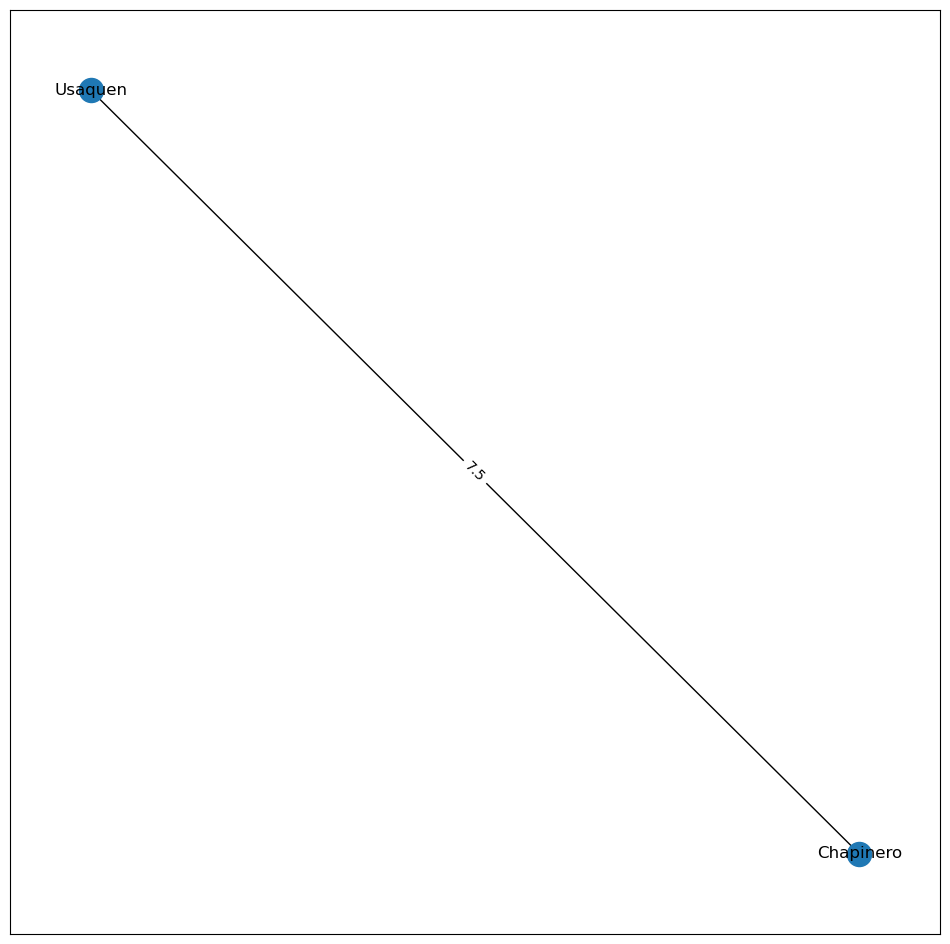

In [32]:
prob = Vendedor('Chapinero')
s = prob.estado_inicial # los estados son listas de localidades
prob.pintar_estado(s)

In [179]:
def primero_en_profundidad(problema):

    estado = problema.estado_inicial
    if problema.test_objetivo(estado): return estado
    frontera = []
    frontera.append(estado)
    costo = 0
    camino = [estado[0]]
    while not (problema.test_objetivo(camino)):
        acciones = [x for x in prob.acciones_aplicables(camino[-1]) if x not in camino]
        accion = choice(acciones)
        costo += problema.costo(camino, accion)
        camino = problema.transicion(camino, accion)
        print (camino)
        if problema.test_objetivo(camino):return camino, costo 
        
    return None

['Chapinero', 'Engativa']
['Chapinero', 'Engativa', 'Usme']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal', 'Fontibon']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal', 'Fontibon', 'Usaquen']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal', 'Fontibon', 'Usaquen', 'Tunjuelito']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal', 'Fontibon', 'Usaquen', 'Tunjuelito', 'Barrios Unidos']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal', 'Fontibon', 'Usaquen', 'Tunjuelito', 'Barrios Unidos', 'Suba']
['Chapinero', 'Engativa', 'Usme', 'Santa Fe', 'Bosa', 'San Cristobal', 'Fontibon', 'Usaquen', 'Tunjuelito', 'Barrios Unidos', 'Suba', 'Kennedy']
185.9


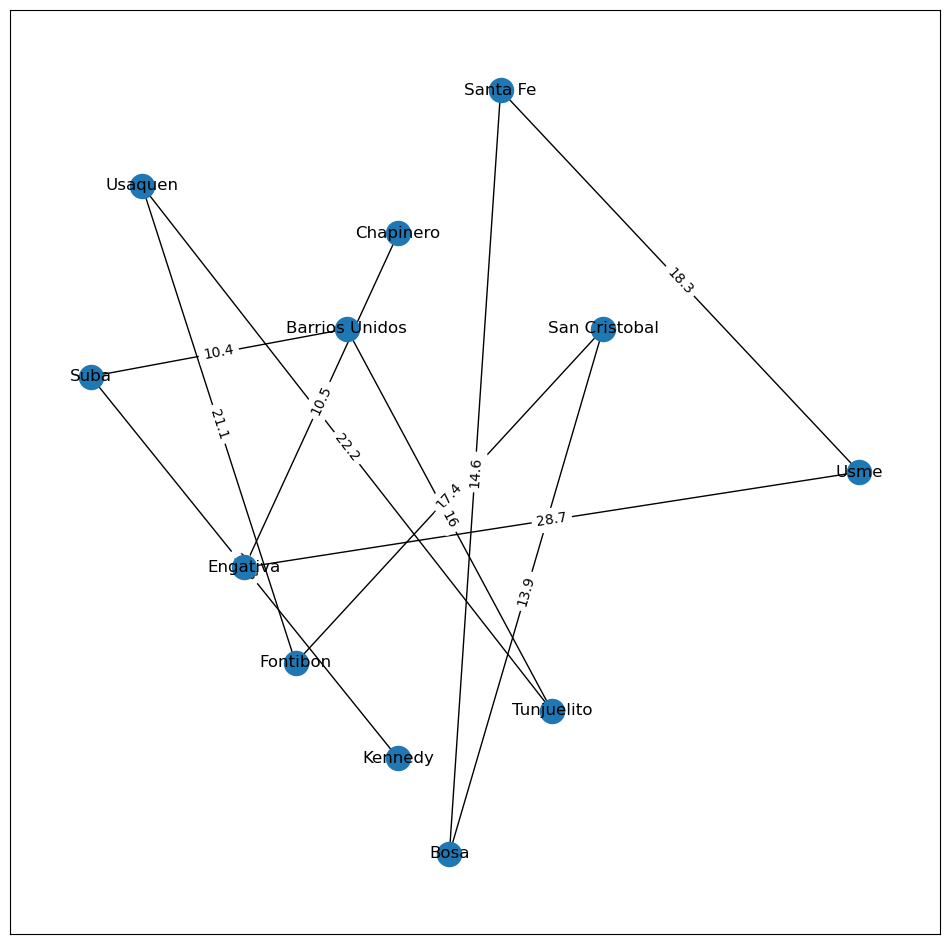

In [180]:
prob = Vendedor('Chapinero')
sol, costo = primero_en_profundidad(prob)
print(costo)
prob.pintar_estado(sol)

In [142]:
def heuristica(prob, camino):
    min_llave_valor = lambda s: min(s, key=lambda s: s[1]) #funcion para obtener el minimo de un tu´la
    diff = [x for x in prob.localidades if x not in camino]# lista de keys con los valores que faltan por recorrer
    all_local = prob.rutas[camino[-1]].keys()# todos los keys del ultimo elmento recorrido
    s = [(local, prob.rutas[camino[-1]][local]) for local in all_local  if local in diff ]
    # for para encontrar  todos los localidades costo que no se han recorrido 
    return min_llave_valor(s)
    
def avara(prob):
    s = prob.estado_inicial
    costo = 0
    camino = [s[0]]
    
    while not(prob.test_objetivo(camino)):
        llave_valor_minimo = heuristica(prob, camino)
        local = llave_valor_minimo[0]
        camino = prob.transicion(camino,local)
        costo += llave_valor_minimo[1] 
    return camino, costo 

95.4


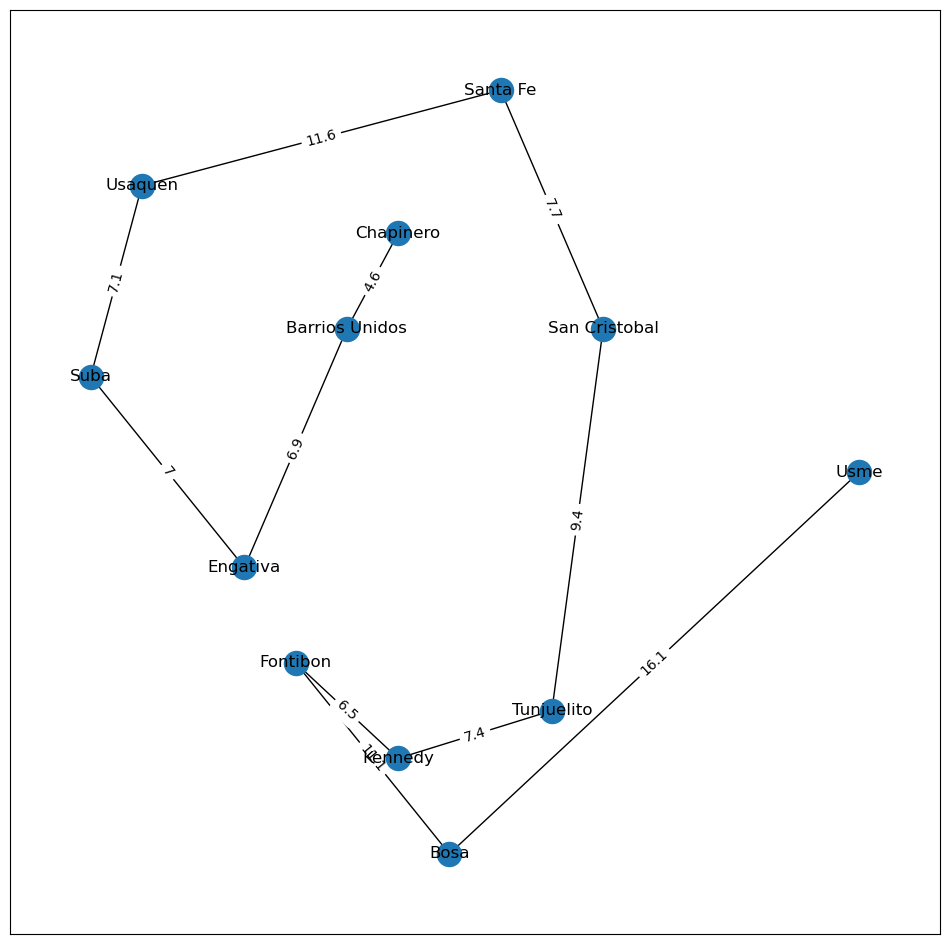

In [148]:
prob = Vendedor('Chapinero')
camino, costo = avara(prob)
print(costo)
prob.pintar_estado(camino)


In [144]:
camino

['Chapinero',
 'Barrios Unidos',
 'Engativa',
 'Suba',
 'Usaquen',
 'Santa Fe',
 'San Cristobal',
 'Tunjuelito',
 'Kennedy',
 'Fontibon',
 'Bosa',
 'Usme']